Reading Images...
image1 loaded successfully, shape: (253, 199, 3)
image2 loaded successfully, shape: (233, 216, 3)
image3 loaded successfully, shape: (394, 700, 3)
image3 resized to (512, 288) for faster processing.
Reshaping Images...
Enter clusters for 3 images (e.g., 3 3 3): 3 3 3
Clustering...
Creating Segmented Images...
Segmented Image 1


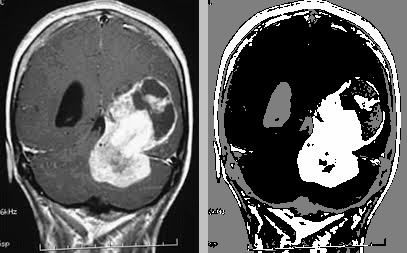

Segmented Image 2


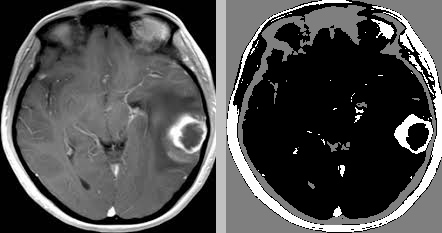

Segmented Image 3


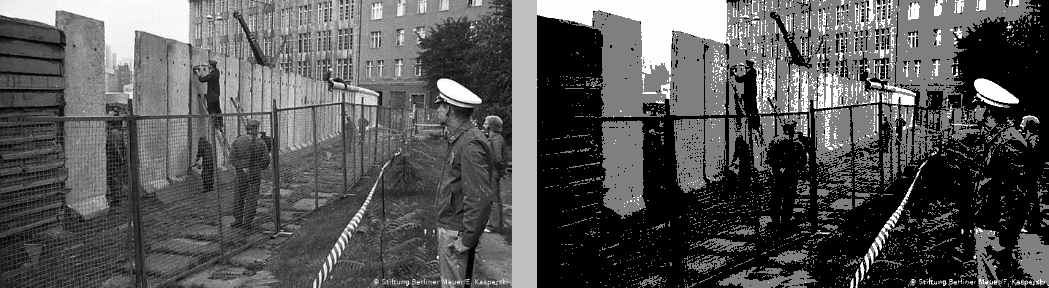

Saving results...
Saved: output_1_C3.png
Saved: output_2_C3.png
Saved: output_3_C3.png
Program executed successfully ✅


In [2]:
# Full K-Means Image Segmentation Code for Google Colab

import numpy as np
from sklearn.cluster import KMeans
import cv2
from google.colab.patches import cv2_imshow
import datetime

# -------------------------------
# 1. Read uploaded images
# -------------------------------
print("Reading Images...")
image1 = cv2.imread("mri1.jpg")
image2 = cv2.imread("mri2.jpg")
image3 = cv2.imread("Berlin.jpg")
images = [image1, image2, image3]

# Check if images are loaded
for i, img in enumerate(images, start=1):
    if img is None:
        print(f"Error: image{i} not found! Make sure it is uploaded.")
        exit()
    else:
        print(f"image{i} loaded successfully, shape: {img.shape}")

# -------------------------------
# 2. Resize images if large for faster processing
# -------------------------------
for i in range(3):
    max_dim = 512  # maximum dimension
    h, w = images[i].shape[:2]
    if max(h, w) > max_dim:
        scale = max_dim / max(h, w)
        new_size = (int(w*scale), int(h*scale))
        images[i] = cv2.resize(images[i], new_size)
        print(f"image{i+1} resized to {new_size} for faster processing.")

# -------------------------------
# 3. Reshape images for KMeans
# -------------------------------
print("Reshaping Images...")
reshaped = [img.reshape((-1,3)) for img in images]

# -------------------------------
# 4. Input number of clusters
# -------------------------------
numClusters = list(map(int, input("Enter clusters for 3 images (e.g., 3 3 3): ").split()))
if len(numClusters) != 3:
    print("Please enter exactly 3 numbers!")
    exit()

# -------------------------------
# 5. Apply KMeans clustering
# -------------------------------
print("Clustering...")
clustering = []
for i in range(3):
    kmeans = KMeans(n_clusters=numClusters[i], n_init=10, max_iter=300, random_state=42)
    kmeans.fit(reshaped[i])
    clustering.append(kmeans.labels_.reshape(images[i].shape[0], images[i].shape[1]))

# -------------------------------
# 6. Sort cluster labels by size
# -------------------------------
sortedLabels = [sorted(range(numClusters[i]), key=lambda x: -np.sum(clustering[i]==x)) for i in range(3)]

# -------------------------------
# 7. Create segmented images
# -------------------------------
print("Creating Segmented Images...")
concatImages = []

for j in range(3):
    KNNImage = np.zeros(images[j].shape[:2], dtype=np.uint8)
    for i, label in enumerate(sortedLabels[j]):
        KNNImage[clustering[j] == label] = int(255/(numClusters[j]-1))*i

    # Separator between original and segmented image
    separator = 193*np.ones((images[j].shape[0], int(0.05*images[j].shape[1]),3), dtype=np.uint8)
    concat = np.concatenate((images[j], separator, cv2.cvtColor(KNNImage, cv2.COLOR_GRAY2BGR)), axis=1)
    concatImages.append(concat)

# -------------------------------
# 8. Display results in Colab
# -------------------------------
for i, img in enumerate(concatImages, start=1):
    print(f"Segmented Image {i}")
    cv2_imshow(img)

# -------------------------------
# 9. Save results
# -------------------------------
print("Saving results...")
for i, img in enumerate(concatImages, start=1):
    fname = f"output_{i}_C{numClusters[i-1]}.png"
    cv2.imwrite(fname, img)
    print(f"Saved: {fname}")

print("Program executed successfully ✅")
